In [130]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
insurance = pd.read_csv("insurance.csv")

In [132]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##  Find the missing values if any

In [133]:
print(insurance.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No missing values are found

## 5 Point summary using

- describe() for min, max, mean, standard deviation

- median() for median

In [134]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [135]:
insurance.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

##  5 point summary using visualization

### Box plot

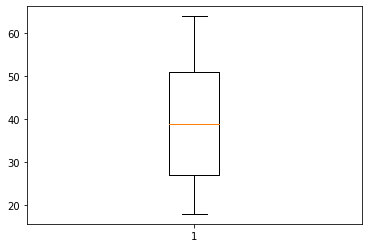

In [136]:
plt.boxplot(insurance.age)
plt.show()

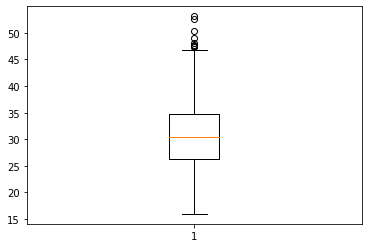

In [137]:
plt.boxplot(insurance.bmi)
plt.show()

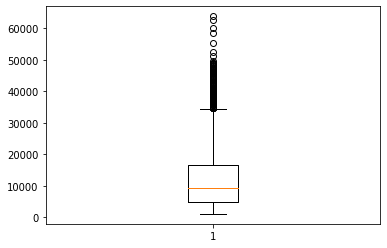

In [138]:
plt.boxplot(insurance.charges)
plt.show()

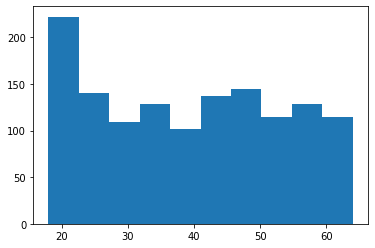

In [139]:
plt.hist(insurance.age)
plt.show()

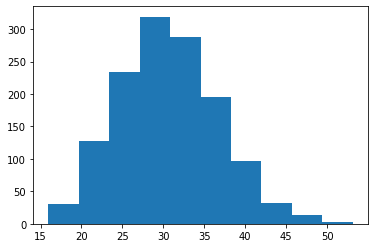

In [140]:
plt.hist(insurance.bmi)
plt.show()

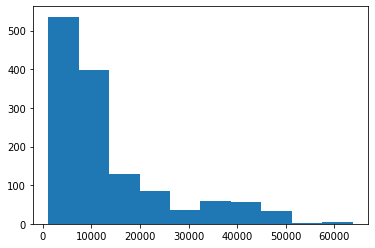

In [141]:
plt.hist(insurance.charges)
plt.show()

## Skewness

In [142]:
print("bmi : ", insurance['bmi'].skew())
print("age : ", insurance['age'].skew())
print("charges : ", insurance['charges'].skew())

bmi :  0.2840471105987448
age :  0.05567251565299186
charges :  1.5158796580240388


## Kurtosis

In [143]:
print("bmi : ", insurance['bmi'].kurtosis())
print("age : ", insurance['age'].kurtosis())
print("charges : ", insurance['charges'].kurtosis())

bmi :  -0.05073153135467834
age :  -1.2450876526418673
charges :  1.6062986532967907


## Outlier Detection

In [144]:
ageQ1 = insurance['age'].quantile(0.25)
ageQ3 = insurance['age'].quantile(0.75)
ageIQR = ageQ3 - ageQ1
print("IQR:")
print(ageIQR)
print(insurance['age'][(insurance['age'] < (ageQ1 - 1.5 * ageIQR))])
print(insurance['age'][(insurance['age'] > (ageQ3 + 1.5 * ageIQR))])

IQR:
24.0
Series([], Name: age, dtype: int64)
Series([], Name: age, dtype: int64)


#### No Outliers in age column

In [145]:
bmiQ1 = insurance['bmi'].quantile(0.25)
bmiQ3 = insurance['bmi'].quantile(0.75)
bmiIQR = bmiQ3 - bmiQ1
print("IQR:")
print(bmiIQR)
print(insurance['bmi'][(insurance['bmi'] < (bmiQ1 - 1.5 * bmiIQR))])
print(insurance['bmi'][(insurance['bmi'] > (bmiQ3 + 1.5 * bmiIQR))])

IQR:
8.3975
Series([], Name: bmi, dtype: float64)
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


#### Outliers are present in bmi column

In [146]:
chargesQ1 = insurance['charges'].quantile(0.25)
chargesQ3 = insurance['charges'].quantile(0.75)
chargesIQR = chargesQ3 - chargesQ1
print("IQR:")
print(chargesIQR)
print(insurance['charges'][(insurance['charges'] < (chargesQ1 - 1.5 * chargesIQR))])
print(insurance['charges'][(insurance['charges'] > (chargesQ3 + 1.5 * chargesIQR))])

IQR:
11899.625365
Series([], Name: charges, dtype: float64)
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


#### Outliers are present in charges  column

### Label Encoding for categorical variables before checking distribution

In [147]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#Sex column
print(insurance['sex'].value_counts())
insurance['sex']=label_encoder.fit_transform(insurance['sex'])
print(insurance['sex'].value_counts())
#Child column
print(insurance['children'].value_counts())
insurance['children']=label_encoder.fit_transform(insurance['children'])
print(insurance['children'].value_counts())

male      676
female    662
Name: sex, dtype: int64
1    676
0    662
Name: sex, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [148]:
print(insurance['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [149]:
print(insurance['region'].value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [150]:
insurance['smoker']=label_encoder.fit_transform(insurance['smoker'])

In [151]:
insurance['region']=label_encoder.fit_transform(insurance['region'])

In [152]:
print(insurance['smoker'].value_counts())

0    1064
1     274
Name: smoker, dtype: int64


In [153]:
print(insurance['region'].value_counts())

2    364
3    325
1    325
0    324
Name: region, dtype: int64


### Checking the distribution of categorical variables

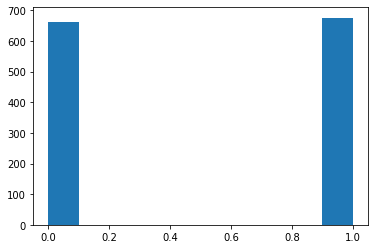

In [154]:
plt.hist(insurance.sex)
plt.show()

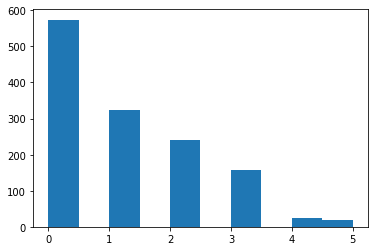

In [155]:
plt.hist(insurance.children)
plt.show()

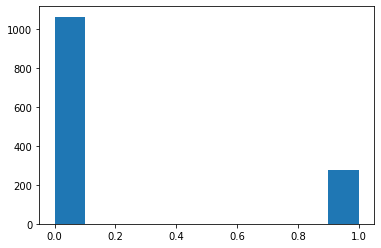

In [156]:
plt.hist(insurance.smoker)
plt.show()

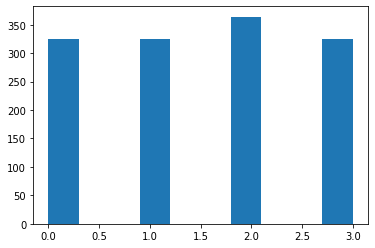

In [157]:
plt.hist(insurance.region)
plt.show()

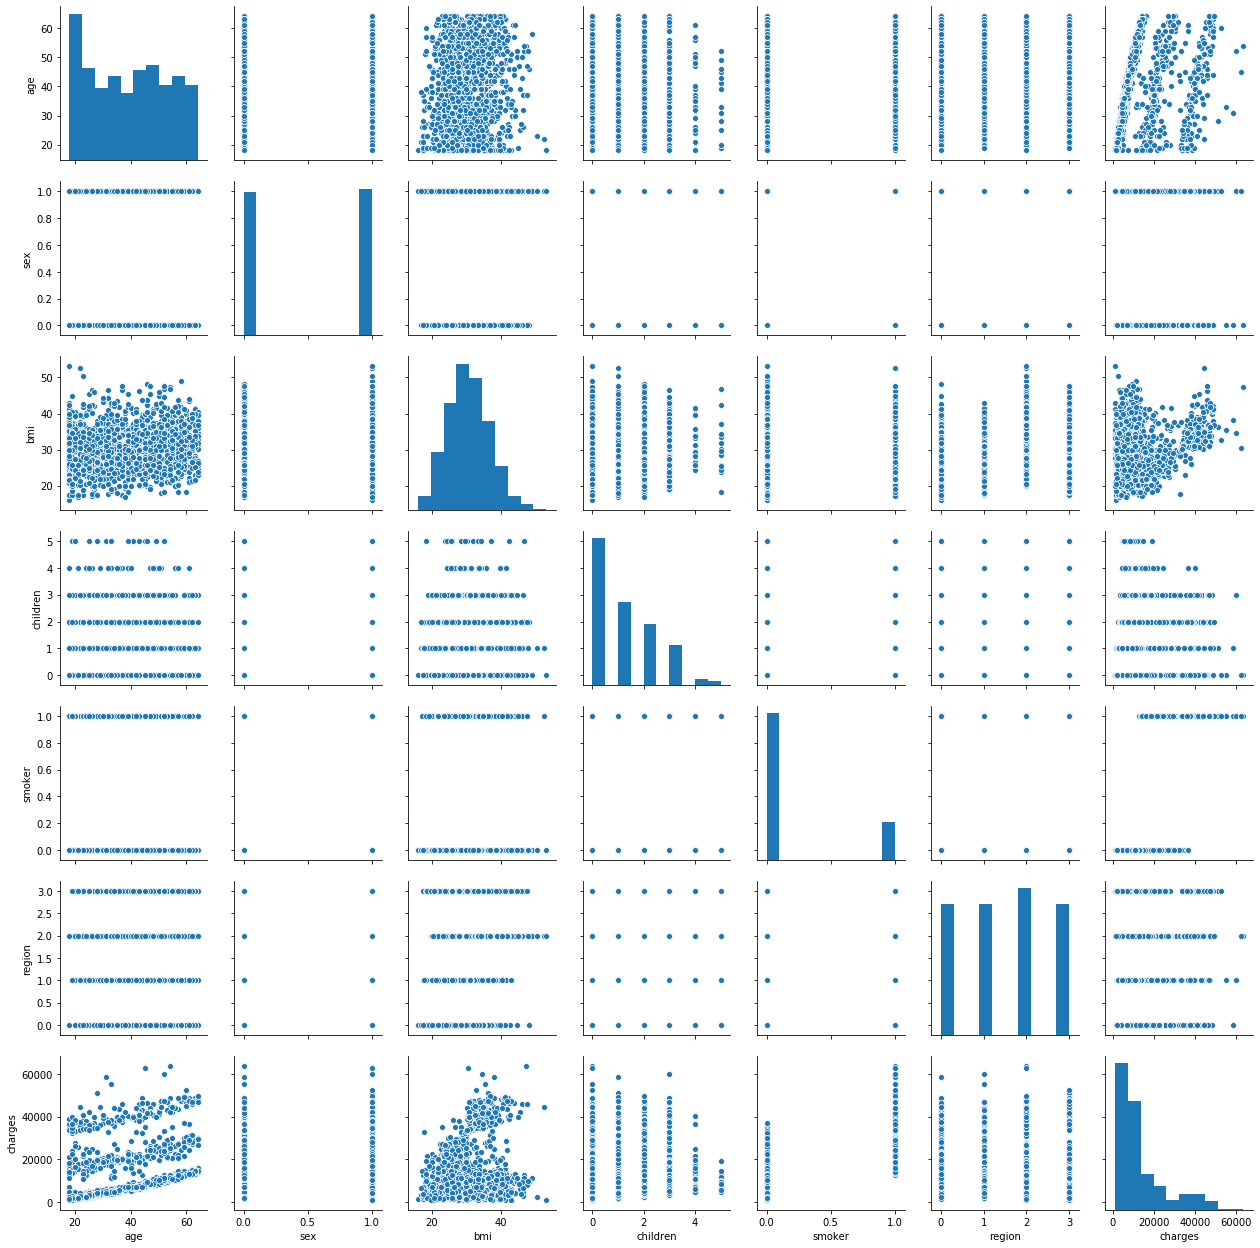

In [158]:
import seaborn as sns
sns.pairplot(insurance)

### 4. Answer the following questions with statistical evidence
#### a. Do charges of people who smoke differ significantly from the people who don't ?

* $H_0$: $\mu1$        = $\mu2$ Mean of Charges of people who smoke are not significantly different from the charges of people who doesnt
* $H_a$: $\mu1$ $\neq$ $\mu2$ Mean of Charges of people who smoke are significantly different from the charges of people who doesnt

In [159]:
from scipy.stats  import ttest_ind
t_statistic,p_value = ttest_ind(insurance.loc[insurance['smoker']==0]['charges'],insurance.loc[insurance['smoker']==1]['charges'])
print("two-sample test t-test p-value = ", p_value)

two-sample test t-test p-value =  8.271435842177219e-283


As the p value 8.2714e-283 is very very low we reject the Null hypothesis at 5% level of significance. We conclude that there is a significant difference in the charges on smokers and non smokers

#### b.Does bmi of males differ significantly from that of  females?  

* $H_0$: $\mu1$        = $\mu2$ mean of bmi of male are not significantly different from the bmi of female
* $H_a$: $\mu1$ $\neq$ $\mu2$ mean of bmi of male are significantly different from the bmi of female

In [161]:
from scipy.stats  import ttest_ind
t_statistic2,p_value2 = ttest_ind(insurance.loc[insurance['sex']==0]['bmi'],insurance.loc[insurance['sex']==1]['bmi'])
print("two-sample test t-test p-value = ", p_value2)

two-sample test t-test p-value =  0.08997637178984932


As the p value 0.089 is greater than alpha = 0.05 we fail to reject the Null hypothesis at 5% level of significance. We conclude that there is no significant difference between the bmis of male and female

#### c.Is the proportion of smokers significantly different  in different genders? 

* $H_0$: $\mu1$        = $\mu2$ mean of smokers among men are not significantly different from the mean of smokers among women
* $H_a$: $\mu1$ $\neq$ $\mu2$ mean of smokers among men are significantly different from the mean of smokers among women

In [163]:
t_statistic3,p_value3 = ttest_ind(insurance.loc[insurance['sex']==0]['smoker'],insurance.loc[insurance['sex']==1]['smoker'])
print("two-sample test t-test p-value = ", p_value3)

two-sample test t-test p-value =  0.005300369127374036


As the p value 0.0053 is less than alpha = 0.05 we reject the Null hypothesis at 5% level of significance. 

We hence conclude that the proportion of smokers is significantly different in different genders

In [121]:
#Validating the answer bby verifying the means 
print(insurance.loc[insurance['sex']==0]['smoker'].mean())
print(insurance.loc[insurance['sex']==1]['smoker'].mean())

0.17371601208459214
0.23520710059171598


#### d.Is the distribution of bmi across women with no  children, one child and two children, the same ? 

#### We solve this using one way anova test
Null Hypothesis - Mean of the bmis of females with no child, one child & two child) are not significantly different

Alternate Hypothesis - Means of atleast one of the bmis of the females with no child, one child or two child are significatly different from the others

In [129]:
from scipy.stats import f_oneway
stat_female_bmi, p_female_bmi = f_oneway(insurance[(insurance.sex ==0) &  (insurance.children ==0)]['bmi'], insurance[(insurance.sex ==0) &  (insurance.children ==1)]['bmi'], insurance[(insurance.sex ==0) &  (insurance.children ==2)]['bmi'])
print('stat=%.3f, p=%.3f' % (stat_female_bmi, p_female_bmi))
if p_female_bmi > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.334, p=0.716
Probably the same distribution


As the p value is 71.6% which is very high when compared to alpha (5%), we fail to reject the null hypothesis that the distributions are not significantly different. 

We therefore conclude that there is no significant difference in the bmi among the females with no child / one child / two child

In [82]:
#validating the answer by verifying the means
print(insurance[(insurance.sex ==0) &  (insurance.children ==0)]['bmi'].mean())
print(insurance[(insurance.sex ==0) &  (insurance.children ==1)]['bmi'].mean())
print(insurance[(insurance.sex ==0) &  (insurance.children ==2)]['bmi'].mean())

30.361522491349486
30.05265822784811
30.64978991596637
